# Частина друга

Нехай все населення ($N$ індивідів) ділиться на три групи: індивіди, які сприйнятливі до цієї хвороби, але здорові (susceptible) $S(t)$; заражені індивіди (infected) - $I(t)$ (вони хворі самі і є носіями хвороби) та здорові індивіди, які мають імунітет до даної хвороби (recovered) - $R(t)$.

Приймемо, що 
$$
S(t) + I(t) + R(t) = N \quad\quad\quad \textbf{(1)}
$$

Вважаємо, що коли кількість інфікованих перевищує певне фіксоване значення $I^{*}$, швидкість зміни числа сприйнятливих до хвороби індивідів буде пропорційно числу самих сприйнятливих індивідів. $$\frac{dS}{dt} = -αS \quad\quad\quad \textbf{(2)}$$
Тепер, коли кожен сприйнятливий до хвороби індивід зрештою занедужує і стає інфекційним, то швидкість зміни інфікованих індивідів це різниця за одиницю часу між захворілими і тими хто одужує. $$\frac{dI}{dt} = αS - βI \quad\quad\quad \textbf{(3)} $$
Постійні пропорційності $α$ та $β$ називають коефіцієнтами захворюваності та одужання відповідно.

Швидкість зміни числа індивідів, що одужують: $$\frac{dR}{dt} = \beta S \quad\quad\quad \textbf{(4)}$$
Щоб рішення відповідних рівнянь визначалися однозначно, необхідно задати початкові умови. Приймемо, що:


*   $α = 0.5$
*   $β = 0.3$
*   $N = 1000000$
*   $S(0) = 990000$
*   $I(0) = 7000$
*   $R(0) = 3000$
*   $t_{0}, t_{f} = 0,25$




Необхідно виконати:

1. Розв'язати диференціальне рівняння (2) та побудувати графік функції $S(t)$

In [147]:
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np

alpha, beta = 0.5, 0.3
N = 1_000_000
S0, I0, R0 = 990_000, 7000, 3000
t0, tf = 0, 25

In [148]:
def dSdt(t, S):
  return -alpha*S

In [149]:
soln_S = solve_ivp(dSdt, (t0, tf), [S0], dense_output=True)
print(soln_S)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f3536253f70>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None


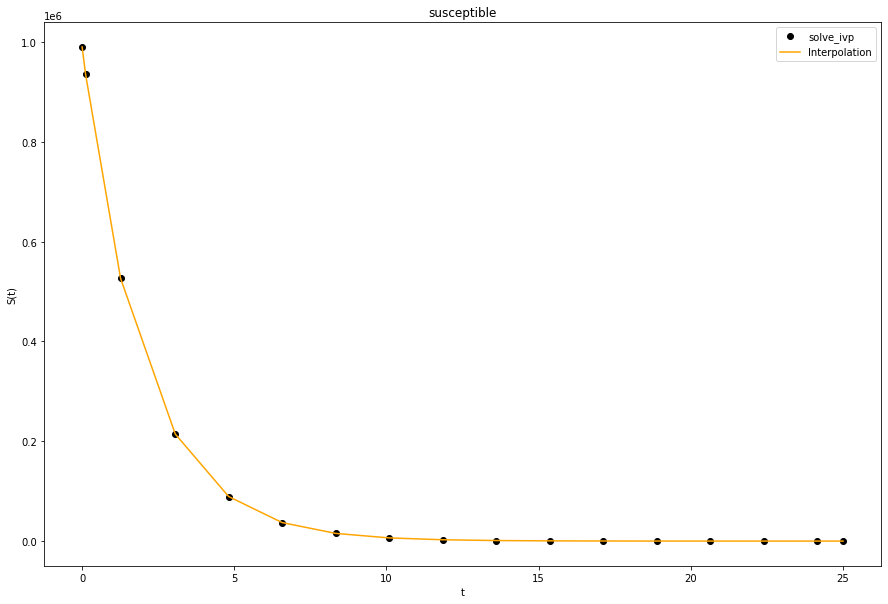

In [150]:
t_S, y_S = soln_S.t, soln_S.y[0]
z_S, = soln_S.sol(t_S)
plt.plot(t_S, y_S, 'o', color='k', label='solve_ivp')
plt.plot(t_S, z_S, color='orange', label='Interpolation')

plt.title('susceptible')
plt.xlabel('t')
plt.ylabel('S(t)', )

plt.legend()
plt.show()

2. Розв'язати диференціальне рівняння (3) та побудувати графік функції  $I(t)$

In [151]:
def dIdt(t, I):
  return alpha*soln_S.sol(t) - beta*I

In [152]:
soln_I = solve_ivp(dIdt, (t0, tf), [I0], dense_output=True)
print(soln_I)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f35365ce280>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.46534293e+00,
       3.30463452e+00, 5.49012015e+00, 8.32920731e+00, 1.14496758e+01,
       1.45701443e+01, 1.76449222e+01, 2.06395417e+01, 2.36032033e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  7000.        ,  13960.24492701,  79326.36974353,
        409578.08332734, 446699.01195851, 319077.83028019,
        165571.99131376,  71966.74863635,  29712.58392623,
         12130.57394035,   5009.75291414,   2075.26330114,
          1367.85128541]])
 y_events: None


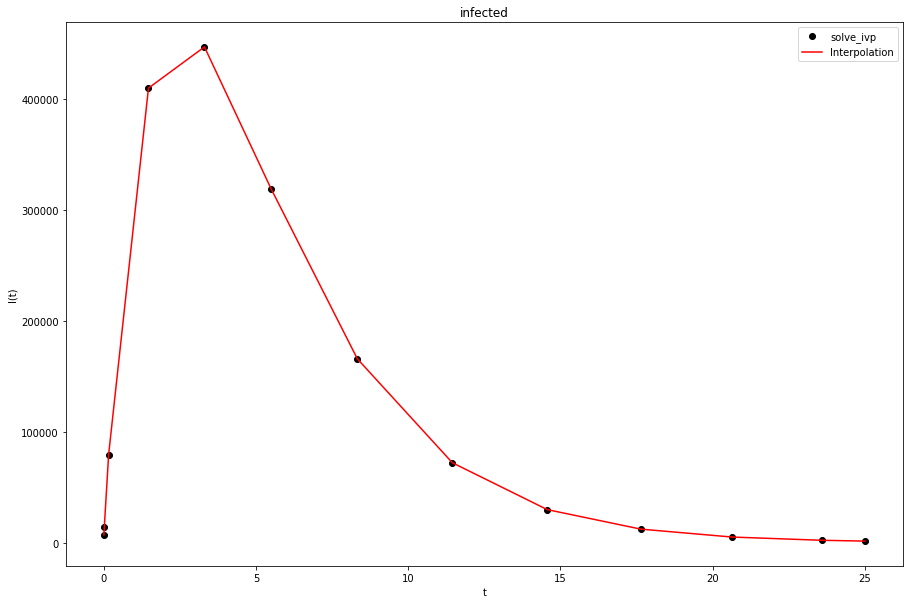

In [153]:
t_I, y_I = soln_I.t, soln_I.y[0]
z_I, = soln_I.sol(t_I)

plt.plot(t_I, y_I, 'o', color='k', label='solve_ivp')
plt.plot(t_I, z_I, color='red', label='Interpolation')

plt.title('infected')
plt.xlabel('t')
plt.ylabel('I(t)')

plt.legend()
plt.show()

3. Використовуючи рішення рівнянь (2) і (3), за допомогою рівняння (1), знайти рішення рівняння (4) (використовуйте інтерполяцію `interp1d`) та побудувати графік функції $R(t)$

In [154]:
R = N - soln_S.sol(t) - soln_I.sol(t)
R

array([[  3000.        ,   3044.67879914,   5059.67934335,
        114639.07125091, 363523.03451396, 617284.01526216,
        819016.20741332, 924793.9246798 , 969606.55254721,
        987722.92215429, 994957.42512528, 997917.27717482,
        998628.43572803]])

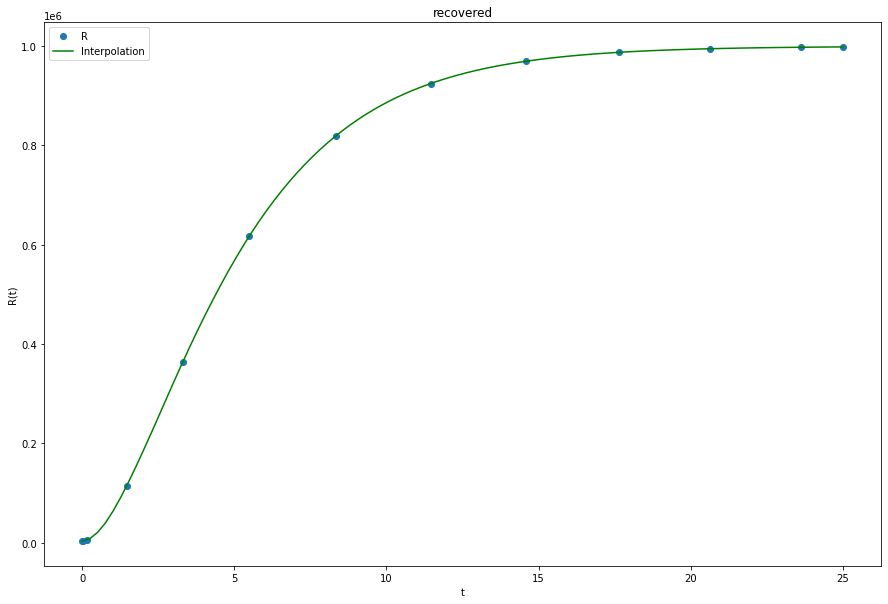

In [155]:
f = interp1d(t, R[0], kind='cubic')

plt.plot(t, R[0], 'o', label='R')
more_date = np.linspace(t0, tf, 100)
plt.plot(more_date, f(more_date), color='green', label='Interpolation')

plt.title('recovered')
plt.xlabel('t')
plt.ylabel('R(t)', )

plt.legend()
plt.show()

4. Побудувати всі три графіки $S(t)$, $I(t)$ та $R(t)$ на одній області відображення

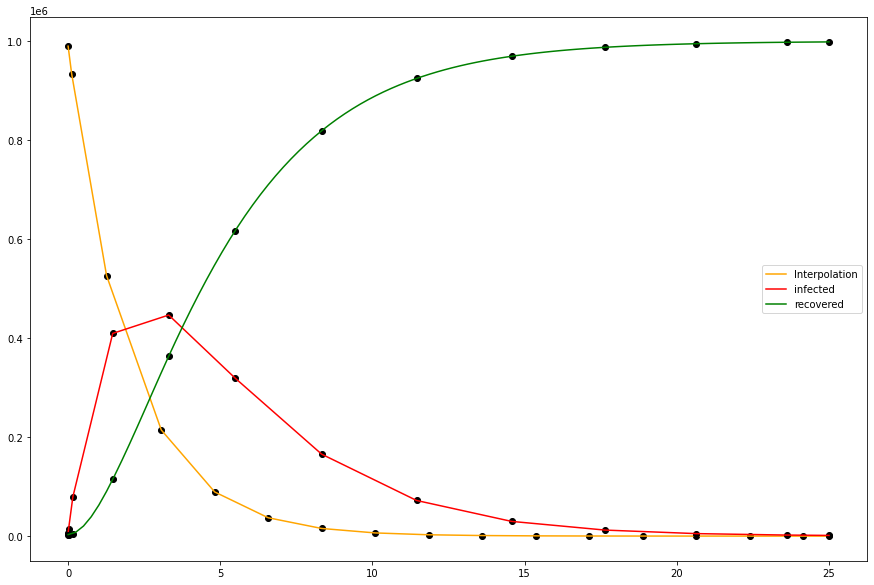

In [156]:
plt.rcParams['figure.figsize'] = (15, 10)

plt.plot(t_S, y_S, 'o', color='k')
plt.plot(t_S, z_S, color='orange', label='Interpolation')

plt.plot(t_I, y_I, 'o', color='k')
plt.plot(t_I, z_I, color='red', label='infected')

plt.plot(t, R[0], 'o', color='k')
more_date = np.linspace(t0, tf, 100)
plt.plot(more_date, f(more_date), color='green', label='recovered')

plt.legend()
plt.show()